In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get the current directory and the processed directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
processed_dir = os.path.join(parent_dir, 'processed')

# Get the list of pickle files in the processed directory
pklfiles = [f for f in os.listdir(processed_dir) if f.endswith('.pkl')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through each pickle file
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    
    # Combine the data with the existing data
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Sort the combined data by filename
combined_data = combined_data.sort_values(by='filename')



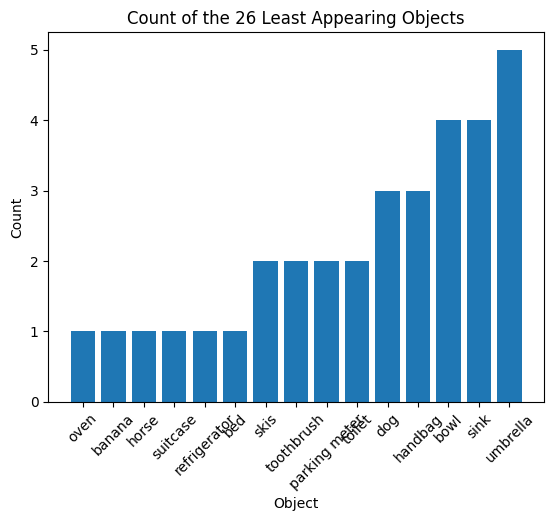

{'toilet': [('ad-be', 'img00972.jpeg'), ('ad-be', 'img01569.jpeg')], 'dog': [('ad-cdu', 'img00001.jpeg'), ('ad-cdu', 'img00002.jpeg'), ('il-be', 'img00001.jpeg')], 'sink': [('ad-cdu', 'img01977.jpeg'), ('ad-cdu', 'img01978.jpeg'), ('ad-livre', 'img01022.jpeg'), ('ad-livre', 'img01023.jpeg')], 'bowl': [('ad-chega', 'img00002.jpeg'), ('ad-ps', 'img04908.jpeg'), ('chega-ps', 'img00005.jpeg'), ('il-cdu', 'img00005.jpeg')], 'umbrella': [('ad-chega', 'img01093.jpeg'), ('ad-chega', 'img01094.jpeg'), ('ad-ps', 'img03207.jpeg'), ('cdu-be', 'img00510.jpeg'), ('cdu-be', 'img00958.jpeg')], 'handbag': [('ad-livre', 'img00705.jpeg'), ('be-ps', 'img02169.jpeg'), ('chega-ps', 'img01905.jpeg')], 'skis': [('ad-pan', 'img01781.jpeg'), ('il-ps', 'img01230.jpeg')], 'toothbrush': [('cdu-ps', 'img00003.jpeg'), ('livre-cdu', 'img00003.jpeg')], 'refrigerator': [('chega-cdu', 'img00566.jpeg')], 'banana': [('chega-cdu', 'img00635.jpeg')], 'bed': [('chega-ps', 'img02325.jpeg')], 'suitcase': [('il-cdu', 'img00918.

In [22]:
# Extract object labels
import seaborn as sns

all_detections = [detection for detections in combined_data['detections'] for detection in detections]
labels = [detection[4] for detection in all_detections]

# Count occurrences of each label
label_counts = pd.Series(labels).value_counts()

# Get the 26 least appearing objects
least_appearing_objects = label_counts.nsmallest(15)

# Plot histogram for the 26 least appearing objects
plt.bar(least_appearing_objects.index, least_appearing_objects.values)
plt.xlabel('Object')
plt.ylabel('Count')
plt.title('Count of the 26 Least Appearing Objects')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

# Initialize an empty dictionary to store the mapping
object_frame_mapping = {}

# Iterate through each pickle file again
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    data = data.sort_values(by='filename')
    # Iterate through each detection in the data
    for index, row in data.iterrows():
        filename = pklfile[:-4]  # Remove the '.pkl' extension to get the video name
        detections = row['detections']
        
        
        for frame_number, detection in enumerate(detections, start=1):
            object_label = detection[4]
            
            
            if object_label in least_appearing_objects.index:
                # Add the video name and frame number to the dictionary
                if object_label not in object_frame_mapping:
                    object_frame_mapping[object_label] = []
                object_frame_mapping[object_label].append((filename, row['filename']))


print(object_frame_mapping)

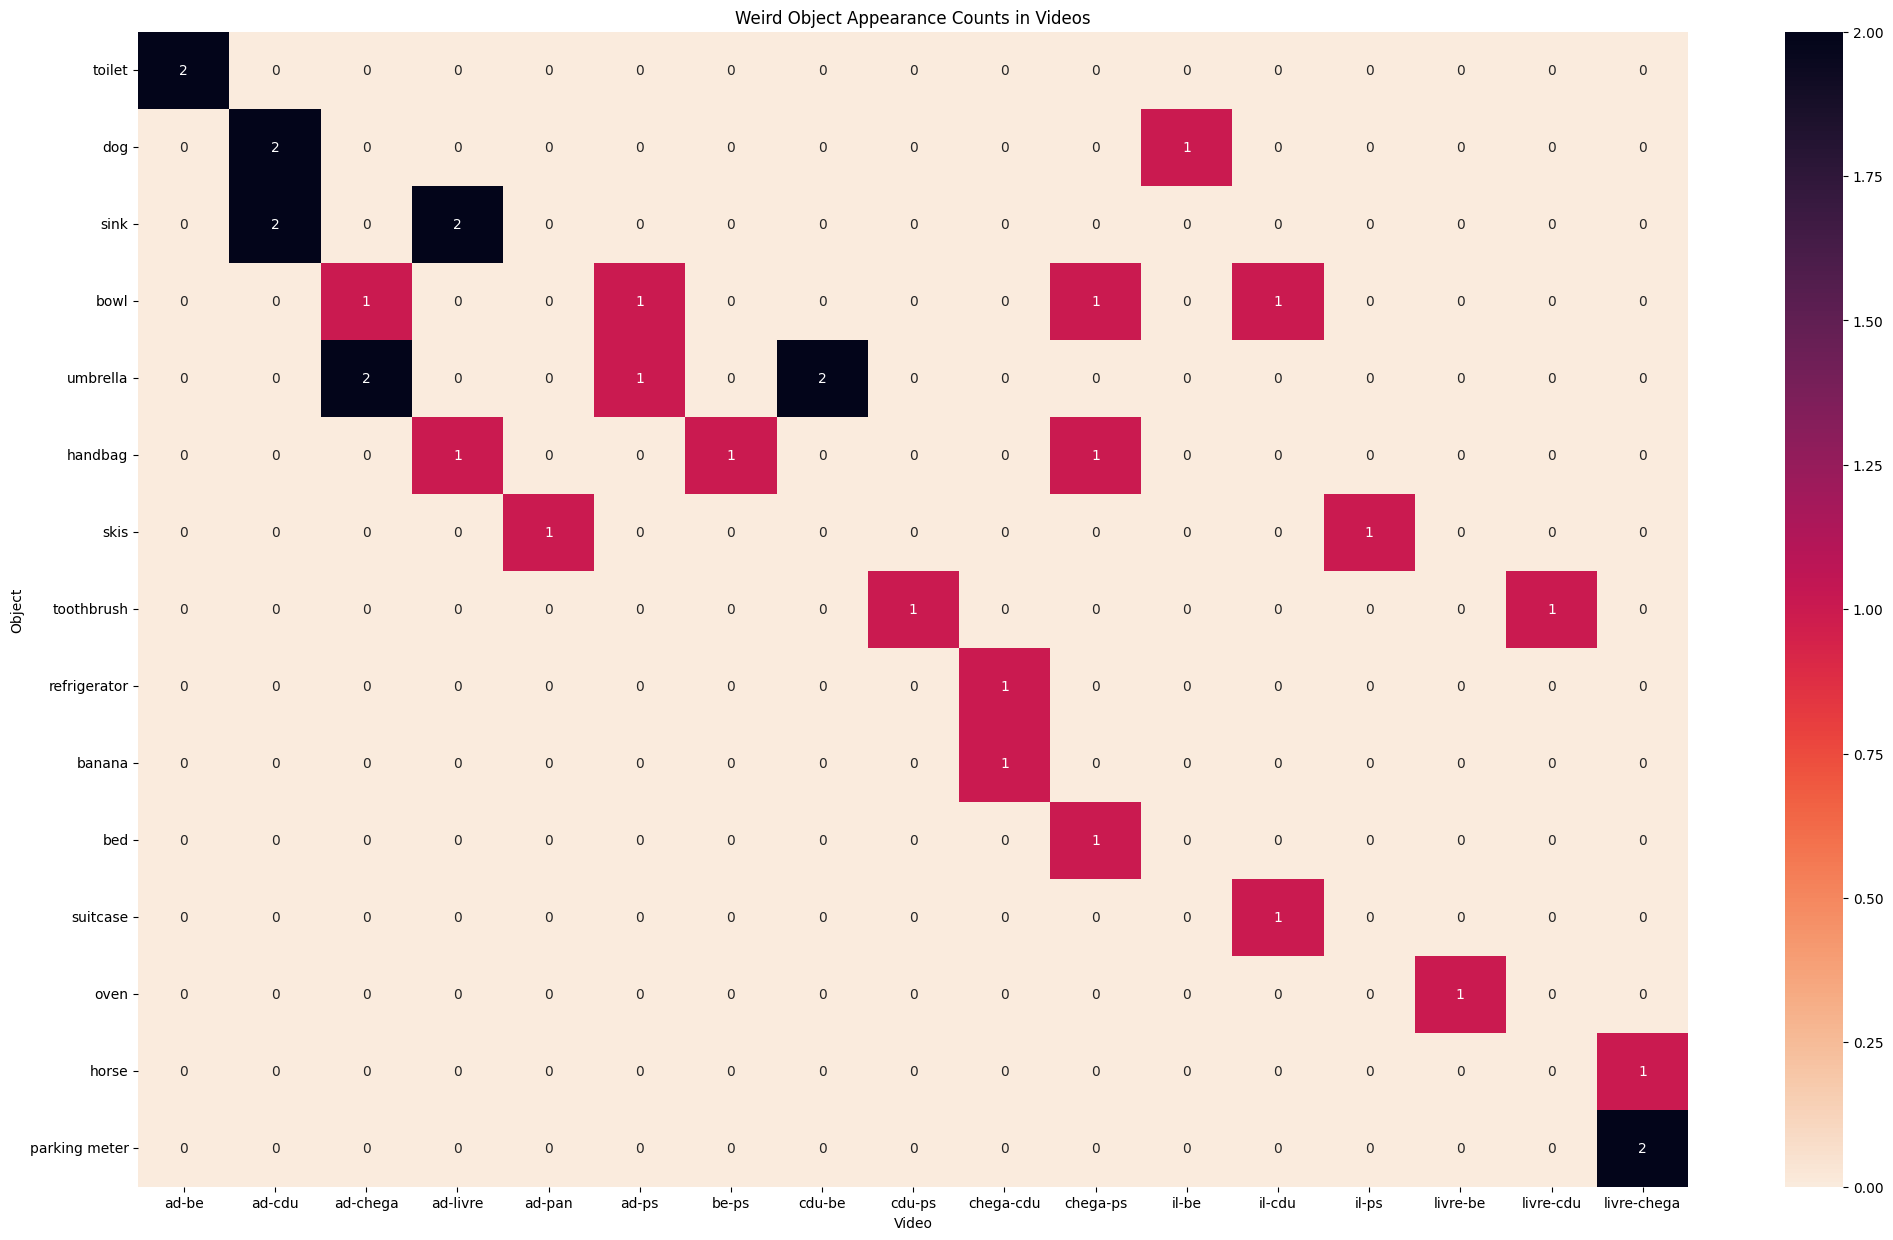

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 640x480 with 0 Axes>

In [21]:
videos = sorted(set([video for video, _ in sum(object_frame_mapping.values(), [])]))

# Initialize an empty dictionary to store object counts per video
object_counts = {video: {obj: 0 for obj in object_frame_mapping.keys()} for video in videos}

# Populate object counts
for obj, video_frames in object_frame_mapping.items():
    for video, frame in video_frames:
        object_counts[video][obj] += 1

# Convert object_counts to a DataFrame
df_counts = pd.DataFrame(object_counts)

cmap = sns.cm.rocket_r
# Plot heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(df_counts, cmap=cmap, cbar=True, annot=True, fmt='g')
plt.xlabel('Video')
plt.ylabel('Object')
plt.title('Weird Object Appearance Counts in Videos')
plt.show()
